In [2]:
# YiChiang's code
from openai import OpenAI
import json
from pprint import pprint
import requests
import json
import glob
import tiktoken
import numpy as np
api_key = open("api_key").read()
# openai.api_key = api_key
client=OpenAI(api_key=api_key)

def save_json(data, filepath=r'new_data.json'):
    with open(filepath, 'w', encoding='utf-8') as fp:
        json.dump(data, fp, indent=4)

def request_chatgpt_gpt4(messages, format=None):
    model = 'gpt-3.5-turbo-0125'
    # model="gpt-4-1106-preview"
    if format == "json":
        response = client.chat.completions.create(
            # model="gpt-4-1106-preview",
            model = model,
            messages=messages,
            response_format={ "type": "json_object" }
        )
    else:
        response = client.chat.completions.create(
            model=model,
            messages=messages,
        )
    return response.choices[0].message.content

def get_embedding(text, model="text-embedding-ada-002"):
    # enc = tiktoken.encoding_for_model(model)
    # # print(len(enc.encode(text)))
    # while len(enc.encode(text)) > 8191:
    #     text = text[:-100]
    #     print(len(enc.encode(text)))
    return client.embeddings.create(input = [text], model=model).data[0].embedding

    url = 'https://api.openai.com/v1/embeddings'
    headers = {
        'Content-Type': 'application/json',
        'Authorization': "Bearer {}".format(api_key)
    }
    data = {
        "input": text,
        "model": model
    }
    res = requests.post(url, headers=headers, json=data)
    res = res.json()
    return res['data'][0]['embedding']


In [11]:
def summarize(text):
    messages = [
        {
            "role": "system",
            "content": """You are a news article summarization system. Please summarize the following article into one paragraph."""
        }, 
        {
            "role": "user",
            "content": text
        }
    ]
    summary = request_chatgpt_gpt4(messages)
    return summary
def needs_improvement(texts): # only outputs yes
    prompts = []
    for text in texts:
        prompt = """
        You are a writing assistant. The user will give you a paragraph, please help him decide if it needs improvement in terms of readability and formality.
        The user will improve themselves. Reply with simply "yes" or "no".""" + "\nParagraph: " + text
        # messages = [
        #     {
        #         "role": "system",
        #         "content": """You are a writing assistant. The user will give you a paragraph, please help him decide if it needs improvement in terms of readability and formality.
        #         The user will improve themselves. Reply with simply "yes" or "no". 
        #         """
        #     }, 
        #     {
        #         "role": "user",
        #         "content": text
        #     }
        # ]
    # prompts.append(messages)
    prompts.append(prompt)
    response = request_chatgpt_gpt4_batch(prompts)
    for choice in response.choices:
        print(choice.text)

    # if res != "yes" and res != "no":
    #     return needs_improvement(text)
    # return res

In [7]:
dataset = json.load(open("data/basic_summaries.json"))

In [29]:
for index, datum in enumerate(dataset[:50]):
    article = datum['article_text']
    print(index)
    summarize(article)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [21]:
import threading
import concurrent
import itertools
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# for index, datum in enumerate(dataset[:5]):
#     article = datum['article_text']
#     t = threading.Thread(target=summarize, args=(article,))
#     t.start()
def multithread_summarize(dataset):
    executor = concurrent.futures.ThreadPoolExecutor(1000)
    # futures = [executor.submit(summarize, group) 
    #         for group in chunks(dataset[:10], 2)]
    futures = [executor.submit(summarize, datum['text'])
            for datum in dataset]
    concurrent.futures.wait(futures)
    return [future.result() for future in futures]
def multithread_embedding(dataset):
    executor = concurrent.futures.ThreadPoolExecutor(10)
    # futures = [executor.submit(summarize, group) 
    #         for group in chunks(dataset[:10], 2)]
    futures = [executor.submit(get_embedding, datum['summary'])
            for datum in dataset]
    concurrent.futures.wait(futures)
    return [future.result() for future in futures]

In [7]:
dataset = json.load(open('data/df_file.json'))
len(dataset)

2225

In [12]:
summaries = multithread_summarize(dataset)

In [13]:
dataset = json.load(open('data/df/df_summaries_features.json'))
embedding = get_embedding(dataset[10]['summary'])

101


In [22]:
dataset = json.load(open('data/df/df_summaries_features.json'))
embeddings = multithread_embedding(dataset)
for index, datum in enumerate(dataset):
    datum['sum_embedding'] = embeddings[index]
save_json(dataset, 'data/df/df_summaries_features_embeddings.json')

133165

147
130
129
160
130
116
134
110
101133

167136

128
173
131133

154
134
129
144
107
142
132
141
134
177
136
128
148
125
123
111
150170

178
137
144
142
151
170
94
215
126
108
130
129
139
151
125
120
120
134
157
145
130
127
91
134
163
114
111
136
146
104
180
151
113
98
124
117
111
116
168
134
127
167
134
113
167
120
137
121
159
127
172
157
126
89
134
128
113
143
123
122
132
128
117
143
131
129
128
117
203
138
139
108
170
100
132
130
204
151
112
173
137
168
133
161
213
141
155
167
192
173
138
123
169
124
214
149
104
147
105
155
145
148143

139
117
131
146
138
153
133
106
118
200
181
112
118
105
170
106
178
149
150
149
127
133
172
121
129
134
113
174
134
143
151
186
175
154
186
87
165
138
151
131
103
144
151
126
180143

146
135
124
124
127
145
146
170
171
136
150
108
121
92
122
119
108
159
176
148
151
169
155
109
143
150
130
117
128
186
157
121
163
109
144
109
154
123
143
132
135
135
102
143
106
121
155
132
151
173
134
110
151
130
148
174
145
111
132
156
118
143
171
114
157
171
17

In [15]:
for index, datum in enumerate(dataset):
    datum['summary'] = summaries[index]
save_json(dataset, 'data/df_summaries.json')

In [18]:
dataset = json.load(open('data/df_summaries.json'))
for datum in dataset:
    summary = datum['summary']
    readability_scores = all_readability_scores(summary)
    formality_scores = all_formality_scores(summary)
    sentiment_scores = [all_sentiment_scores(summary)]
    features = list(readability_scores) + list(formality_scores) + list(sentiment_scores)
    datum['features'] = features
save_json(dataset, 'data/df_summaries_features.json')

In [ ]:
dataset = json.load(open('data/pairwise_evaluation_w_embeddings.json'))
basic_summaries = []
existing_ids = []
for index, datum in enumerate(dataset):
    print(f"Processing {index} / {len(dataset)}")
    if datum['article_id'] in existing_ids: continue
    existing_ids.append(datum['article_id'])
    full_article = datum['article_text']
    full_embedding = datum['full_embedding']
    new_summary = summarize(full_article)
    basic_summaries.append({
        "id": datum['article_id'],
        "article_text": full_article,
        # "full_embedding": full_embedding,
        "summary": new_summary,
    })
save_json(basic_summaries, "data/basic_summaries.json")

In [9]:
from metrics.stylistic import ReadabilityEvaluator, FormalityEvaluator, SentimentEvaluator
def all_readability_scores(text, format="list"):
    evaluator = ReadabilityEvaluator(text)
    if format == "list":
        return evaluator.flesch_kincaid(), \
        evaluator.dale_chall(), \
        evaluator.gunning_fog(), 
        # evaluator.automated_readability_index()[0], \
        # evaluator.reading_time() 

        # return \
        # evaluator.flesch_kincaid(), \
        # evaluator.flesch(), \
        # evaluator.dale_chall(), \
        # evaluator.automated_readability_index(), \
        # evaluator.coleman_liau(), \
        # evaluator.gunning_fog(), \
        # evaluator.spache(), \
        # evaluator.linsear_write(), \
        # evaluator.lix_score(), \
        # evaluator.mcalpine_eflaw(), \
        # evaluator.reading_time() 
        # evaluator.smog(), \

def all_formality_scores(text, format="list"):
    evaluator = FormalityEvaluator(text)
    if format == "list":
        return evaluator.mtld(), \
        evaluator.formality(), \
        evaluator.hdd(), \
        # return \
        # evaluator.formality(), \
        # evaluator.hdd(), \
        # evaluator.mtld(), \
        # evaluator.maas_ttr(), 
def all_sentiment_scores(text):
    evaluator = SentimentEvaluator(text)
    return evaluator.sentiment()

In [18]:
def make_readable(full_text, old_summary):
    messages = [
        {
            "role": "system",
            "content": """You are a writing assistant. You are given an article and a summary written by a novice. Please make the summary more readable."""
        },
        {
            "role": "user",
            "content": "Article: " + full_text + "\nSummary: " + old_summary
        }
    ]
    response = request_chatgpt_gpt4(messages)
    return response
def basic_make_formal(full_text, old_summary):
    messages = [
        {
            "role": "system",
            "content": """You are a writing assistant. You are given an article and a summary written by a novice. Please make the summary more formal."""
        },
        {
            "role": "user",
            "content": "Article: " + full_text + "\nSummary: " + old_summary
        }
    ]
    response = request_chatgpt_gpt4(messages)
    return response

def advanced_make_formal(full_text, old_summary):
    messages = [
        {
            "role": "system",
            "content": """You are a writing assistant. 
            You are given an article and a summary written by a novice. 
            The user wants to make the summary more formal, which is measured by the amount of unique words in the summary.
            Using this definition of formality, make the summary more formal."""
        },
        {
            "role": "user",
            "content": "Article: " + full_text + "\nSummary: " + old_summary
        }
    ]
    response = request_chatgpt_gpt4(messages)
    return response

In [19]:
import json
from nltk.tokenize import word_tokenize

basic_summaries = json.load(open('data/basic_summaries.json'))
for datum in basic_summaries[:3]:
    words = word_tokenize(datum['summary'])
    readability_scores = all_readability_scores(datum['summary'])
    print(datum['summary'])
    # print(readability_scores)
    # readable_summary = make_readable(datum['article_text'], datum['summary'])
    # new_readability_scores = all_readability_scores(readable_summary)
    # print(readable_summary)
    # print(new_readability_scores)
    # print("----------------------------")
    formality_scores = all_formality_scores(datum['summary'])
    print(datum['summary'])
    print(formality_scores)
    basic_formal_summary = basic_make_formal(datum['article_text'], datum['summary'])
    basic_formal_scores = all_formality_scores(basic_formal_summary)
    print(basic_formal_summary)
    print(basic_formal_scores)
    advanced_formal_summary = advanced_make_formal(datum['article_text'], datum['summary'])
    advanced_formal_scores = all_formality_scores(advanced_formal_summary)
    print(advanced_formal_summary)
    print(advanced_formal_scores)
    print("============================")

Baltimore's Mayor Stephanie Rawlings-Blake has replaced Police Commissioner Anthony Batts with his deputy, Kevin Davis, as an interim measure due to the city's distraction from fighting a "crime surge". The city has witnessed a rise in violence following the death of Freddie Gray, and the mayor believes that the focus on the police department's leadership has taken away from addressing the crime. The decision follows criticism of the police's handling of civil unrest and a civil rights review by the US justice department. Kevin Davis is now tasked with bringing accountability to the police force and addressing the growing crime rates in the city.
Baltimore's Mayor Stephanie Rawlings-Blake has replaced Police Commissioner Anthony Batts with his deputy, Kevin Davis, as an interim measure due to the city's distraction from fighting a "crime surge". The city has witnessed a rise in violence following the death of Freddie Gray, and the mayor believes that the focus on the police department'

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy import spatial
import numpy as np
from collections import defaultdict
from sklearn.cluster import OPTICS

def k_means(X, k):
    X = np.array(X)
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Get the cluster centers (representative matrices)
    cluster_centers = kmeans.cluster_centers_

    # Assign each matrix to its nearest cluster
    labels, _ = pairwise_distances_argmin_min(X, cluster_centers)

    # Print the cluster assignments for each matrix
    # for i, label in enumerate(labels):
    #     print(f"Matrix {i + 1} is assigned to Cluster {label + 1}")
    return labels
def optics(X):
    clustering = OPTICS(min_samples=2).fit(X)
    return clustering.labels_

def cos_distance_matrix(X):
    D = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            print(i, j, X.shape[0])
            D[i][j] = spatial.distance.cosine(X[i], X[j])
    return D

def labels_to_clusters(labels):
    clusters = defaultdict(list)
    for index, label in enumerate(labels):
        clusters[label].append(index)
    return clusters

In [41]:
pairwise_evaluation = json.load(open('../experiments/data/pairwise_samples.json'))
better_summary_embeddings = [sample['writer_summary_embedding'] if sample['overall_writer_better'] else sample['llm_summary_embedding'] for sample in pairwise_evaluation.values() ]
better_summary_kmeans = k_means(np.array(better_summary_embeddings), 8)
better_summary_clusters = labels_to_clusters(better_summary_kmeans)

/Users/samytlee/opt/anaconda3/envs/LLMEval/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
for cluster_indicies in better_summary_clusters.values():
    summaries = [list(pairwise_evaluation.values())[index]['writer_summary'] for index in cluster_indicies]
    formality_scores = np.array([list(all_formality_scores(summary)) for summary in summaries])
    print(len(formality_scores))
    if len(formality_scores) == 14: 
        for i, formality_score in enumerate(formality_scores):
            print(summaries[i])
            print(list(formality_score))
    mean_formality_scores = np.mean(formality_scores, axis=0)
    std_formality_scores = np.std(formality_scores, axis=0)
    print(list(mean_formality_scores))
    print(list(std_formality_scores))
    print("==================")

6
[71.37772263831586, 0.7884865464419312, 65.73713713405239, 0.040761378711153755]
[5.420120541200005, 0.05949632460454837, 16.83058964855917, 0.012884141570969884]
11
[71.70349091521899, 0.734808779538253, 67.34995775941232, 0.036478468070029337]
[5.423483706311086, 0.23630652881695005, 16.085207642712618, 0.00902444832330669]
14
James Haskell is a rugby player for the London Wasps. He has an extensive career with playing for other teams in France, Japan, and New Zealand. To celebrate the release of the new Avengers: Age of Ultron movie, Haskell posts an Instagram picture of him dress up as Iron Man. 
[78.94736842105263, 0.8464345738295321, 80.91999999999999, 0.028918651513939353]
This weekend's two FA Cup semi-finals were at Wembley Stadium. The football game came with memorable moments including a montage of close-ups that showed Reading's goalkeeper, Adam Federici, being consoled by Steve Clarke after the final whistle. 
[77.90697674418604, 0.0, 404.3200000000005, 0.004640700931251

In [28]:
import json
basic_summaries = json.load(open('data/basic_summaries.json'))

summary_features = []
for datum in basic_summaries:
    summary = datum['summary'] + "\n" + datum['summary']
    readability_scores = list(all_readability_scores(summary))
    formality_scores = list(all_formality_scores(summary))
    metrics = readability_scores + formality_scores
    summary_features.append(metrics)
clusters = optics(np.array(summary_features))

In [39]:
for sample in summary_features:
    print(sample)

[14.629056603773584, 15.992075471698108, 16.19, 76.4957264957265, 0.7209479297787204, 72.22107991740258, 0.09036230871142843]
[16.116948356807516, 16.164600938967133, 34.76, 71.82203389830508, 0.7962805811117529, 105.85752688172043, 0.0743761676788339]
[15.012666666666668, 16.667166666666667, 13.66, 70.9090909090909, 0.7659255721652108, 93.08032128514057, 0.08392862020823018]
[14.265040650406505, 14.744146341463413, 20.39, 76.42857142857142, 0.768894713633949, 102.8966108966109, 0.08035098522672278]
[12.931502347417844, 14.81572769953052, 22.12, 63.125, 0.7957368567996183, 145.98713826366557, 0.07285680097298891]
[14.429361702127661, 15.673829787234041, 15.25, 70.95238095238095, 0.7219806770492179, 70.9378035617917, 0.0912833980855174]
[15.84742718446602, 16.686941747572817, 16.45, 73.6842105263158, 0.8294266739510459, 134.29764740917213, 0.06962448744474557]
[17.280357142857145, 17.63392857142857, 17.72, 73.52941176470588, 0.7207285471462125, 56.0, 0.09258325013807396]
[11.02023474178

In [16]:
import matplotlib.pyplot as pp
def plot_at_y(arr, val, **kwargs):
    pp.plot(arr, np.zeros_like(arr) + val, 'x', **kwargs)
    pp.show()
# feature_matrix = np.array(summary_features)
# plot_at_y(feature_matrix[:, 0], 0)
# plot_at_y(feature_matrix[:, 1], 0)
# plot_at_y(feature_matrix[:, 2], 0)

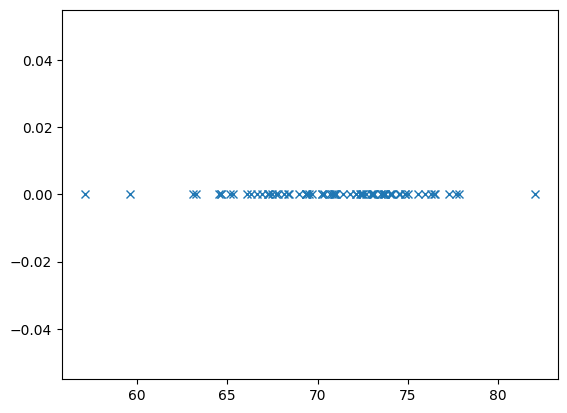

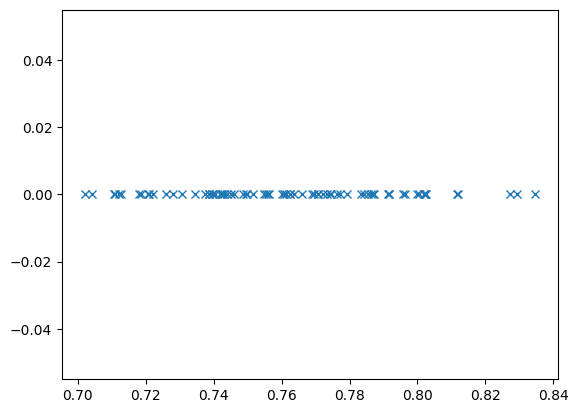

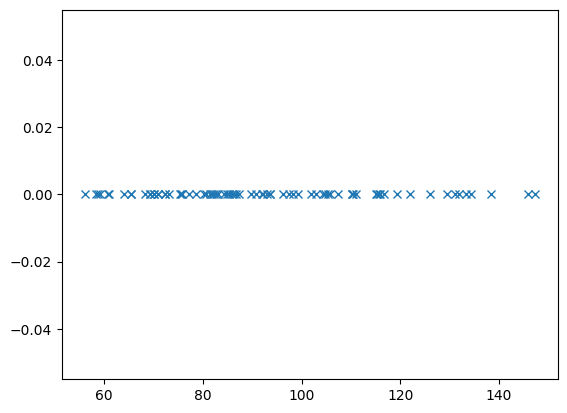

In [40]:
plot_at_y(feature_matrix[:, 3], 0)
plot_at_y(feature_matrix[:, 4], 0)
plot_at_y(feature_matrix[:, 5], 0)


In [32]:
from pprint import pprint
grouped_clusters = labels_to_clusters(clusters)
pprint(grouped_clusters)


defaultdict(<class 'list'>,
            {-1: [1,
                  3,
                  5,
                  7,
                  8,
                  9,
                  10,
                  12,
                  15,
                  24,
                  25,
                  26,
                  31,
                  38,
                  42,
                  44,
                  50,
                  59,
                  66,
                  68,
                  70,
                  74,
                  75],
             0: [0, 14, 41],
             1: [16, 47],
             2: [20, 22],
             3: [13, 46],
             4: [18, 21, 35, 36, 71],
             5: [28, 51],
             6: [40, 43, 56, 73],
             7: [11, 17, 34],
             8: [2, 29],
             9: [37, 58],
             10: [30, 61],
             11: [53, 55],
             12: [33, 49, 65, 67],
             13: [32, 69],
             14: [23, 48],
             15: [27, 60, 62, 64],
       

In [10]:
def flatten(xss):
    return [x for xs in xss for x in xs]
import json
import numpy as np
# pairwise_samples = json.load(open('data/pairwise_samples.json'))
# print(len(pairwise_samples))
dataset = json.load(open('data/df/df_summaries_features_embeddings.json'))
llm_summaries = []
llm_summary_embeddings = []
llm_summary_features = []
for datum in dataset:
    llm_summary = datum['summary']
    llm_summary_embedding = datum['sum_embedding']
    # llm_summary = datum['text-davinci-002_summary']
    # llm_summary_embedding = datum['llm_summary_embedding']
    # llm_summary = llm_summary + "\n" + llm_summary
    readability_scores = all_readability_scores(llm_summary)
    formality_scores = all_formality_scores(llm_summary)
    sentiment_score = [all_sentiment_scores(llm_summary)]
    features = list(readability_scores) + list(formality_scores) + list(sentiment_score)
    llm_summaries.append(llm_summary)
    llm_summary_embeddings.append(llm_summary_embedding)
    llm_summary_features.append(features)
llm_summary_features = np.array(llm_summary_features)
llm_summary_features.shape


(2225, 7)

In [26]:
from sklearn.feature_selection import mutual_info_regression
from itertools import combinations
def feature_selection_by_ig(X, y, threshold):
    ig = mutual_info_regression(X, y)
    salient_features = [index for index, score in enumerate(ig) if score > threshold]
    # Sort the features by importance score in descending order
    # sorted_features = sorted(enumerate(information_gain), key=lambda x: x[1], reverse=True)
    # for feature, score in sorted_features:
    #     print("Feature:", feature, "Score:", score)
    return salient_features
def weighted_overlap_score(list1, list2):
    return sum([min(xi, yi) for xi, yi in zip(list1, list2)]) / sum([max(xi, yi) for xi, yi in zip(list1, list2)])
    # return len(list(set(list1) & set(list2))) / len(list(set(list1) | set(list2)))

def feature_dependencies(X, y):
    overlaps = []
    for i, j in combinations(range(y.shape[1]), 2):
        yi = y[:, i]
        yj = y[:, j]
        ig_i = mutual_info_regression(X, yi)
        ig_j = mutual_info_regression(X, yj)
        # print(ig_i)
        overlap = weighted_overlap_score(ig_i, ig_j)
        print(i, j, overlap)
        overlaps.append(overlap)
        # m[i][j] = overlap
        # m[j][i] = overlap
    return overlaps
    print(np.mean(overlaps), np.std(overlaps))

In [19]:
X = llm_summary_embeddings
# m = np.zeros((llm_summary_features.shape[1], llm_summary_features.shape[1]))

In [27]:

feature_dependencies(X, llm_summary_features)

0 1 0.20813967703923006
0 2 0.3096488784526518
0 3 0.20688748158874054
0 4 0.23822154624839464
0 5 0.19876015931789862
0 6 0.26301751146240704
1 2 0.21580793982807092
1 3 0.1931051964774284
1 4 0.19768916023118263
1 5 0.18083318921929162
1 6 0.20673326259204775
2 3 0.1928243784114316
2 4 0.22856091600275844
2 5 0.20225692258886344
2 6 0.25201808298465384
3 4 0.20139036942880637
3 5 0.21327186899985576
3 6 0.20418302948595546
4 5 0.19827434821467707
4 6 0.2483737782960621
5 6 0.21200009676023124


In [27]:
ranges = [(0, 10), (100, 110), (200, 210), (300, 310), (400, 410)]
for target_range in ranges:
    pairwise_overlaps = feature_dependencies(X[target_range[0]:target_range[1]], llm_summary_features[target_range[0]:target_range[1]])
    print(np.mean(pairwise_overlaps), np.std(pairwise_overlaps))

0 1 0.19662532106189623
0 2 0.3374167895451491
0 3 0.10713067093764168
0 4 0.09552615093181893
0 5 0.1297763679490787
0 6 0.12821452409974923
1 2 0.1939199344349883
1 3 0.17182559333334038
1 4 0.12993531297564626
1 5 0.16360712354979629
1 6 0.18009836287328868
2 3 0.10065370175241194
2 4 0.11517484598783034
2 5 0.12137592010486134
2 6 0.08512320154521716
3 4 0.1368428310992593
3 5 0.3175129159807124
3 6 0.13206206296614983
4 5 0.09602837125971787
4 6 0.11070654232725369
5 6 0.174021682742255
0.15350372511705063 0.06506206872751308


In [16]:
import numpy as np
from scipy import stats
from itertools import combinations

for i, j in combinations(range(llm_summary_features.shape[1]), 2):
    yi = llm_summary_features[:, i]
    yj = llm_summary_features[:, j]
    pearson_r = stats.pearsonr(yi, yj)
    spearman_rs = stats.spearmanr(yi, yj)
    print(i, j, pearson_r.statistic, pearson_r.pvalue, pearson_r.pvalue < 0.05)
    print(i, j, spearman_rs.correlation, spearman_rs.pvalue, spearman_rs.pvalue < 0.05)
    print("--------------------------------")

0 1 0.40797083830950714 5.470514188933219e-90 True
0 1 0.3996429198425692 4.228777355522057e-86 True
--------------------------------
0 2 0.9363255211650918 0.0 True
0 2 0.9311941185977569 0.0 True
--------------------------------
0 3 0.05523890537137813 0.009156911969178286 True
0 3 0.04735002242949656 0.025516402214724898 True
--------------------------------
0 4 0.040357436467388944 0.0569933083707077 False
0 4 0.0348566654273652 0.10022554623780228 False
--------------------------------
0 5 0.011806004572942433 0.5778044585389815 False
0 5 0.0031691092348742206 0.8812356794906175 False
--------------------------------
0 6 -0.06497994516344716 0.0021649627532790905 True
0 6 -0.059342446540311955 0.0051091148118934575 True
--------------------------------
1 2 0.42752916405721947 1.4476729259408757e-99 True
1 2 0.4220545232189335 8.050479252657625e-97 True
--------------------------------
1 3 0.45810402180214477 7.331718811638889e-116 True
1 3 0.44087162375497163 1.7963124387754154e-1

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score
m_ig = np.zeros((llm_summary_features.shape[1], llm_summary_features.shape[1]))
epsilon = 0
for i, j in combinations(range(llm_summary_features.shape[1]), 2):
    yi = llm_summary_features[:, i]
    yj = llm_summary_features[:, j]
    ami = adjusted_mutual_info_score(yi, yj)
    nmi = normalized_mutual_info_score(yi, yj)
    print(i, j, ami, nmi)
    # m_ig[i][j] = ig
    # m_ig[j][i] = ig

In [34]:
labels_true = [0, 0, 0, 0, 0, 0]
labels_pred = [1, 1, 1, 1, 1, 1]
mutual_info_score(labels_true, labels_pred)

0.0

In [10]:
import numpy as np
def sublist(list, indices):
    return [list[index] for index in indices]
readability_feature_matrix = np.array([sublist(x, readability_dimensions) for x in X])
formality_feature_matrix = np.array([sublist(x, formality_dimensions) for x in X])
print(readability_feature_matrix.shape)

(76, 13)


/Users/samytlee/opt/anaconda3/envs/LLMEval/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


defaultdict(<class 'list'>,
            {0: [13,
                 19,
                 23,
                 24,
                 25,
                 30,
                 32,
                 33,
                 35,
                 41,
                 47,
                 50,
                 51,
                 53,
                 55,
                 67,
                 74],
             1: [0,
                 1,
                 5,
                 6,
                 8,
                 9,
                 10,
                 11,
                 18,
                 22,
                 28,
                 39,
                 42,
                 44,
                 45,
                 57,
                 60,
                 61,
                 63,
                 64,
                 69,
                 70,
                 73],
             2: [2, 12, 14, 15, 36, 49, 52, 62, 71, 72, 75],
             3: [3, 7, 16, 17, 27, 29, 31, 43, 56, 59, 66, 68],
           

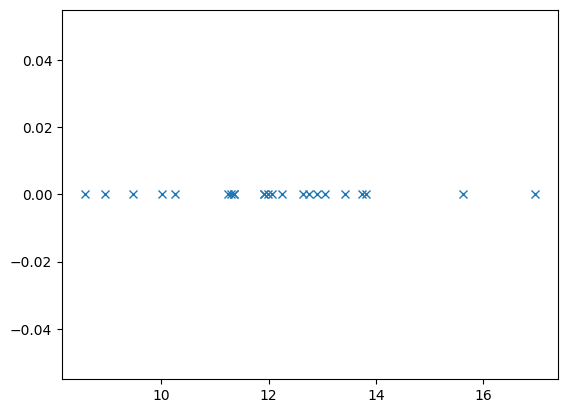

Group 2


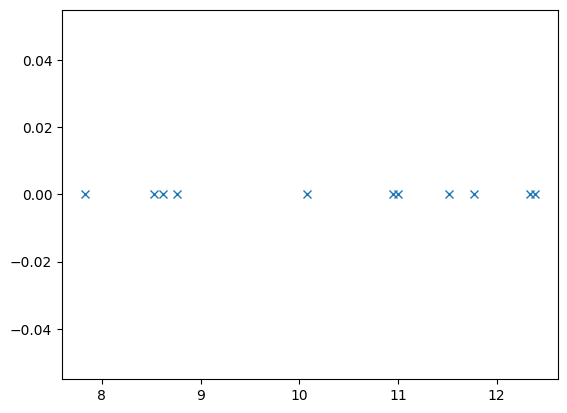

Group 3


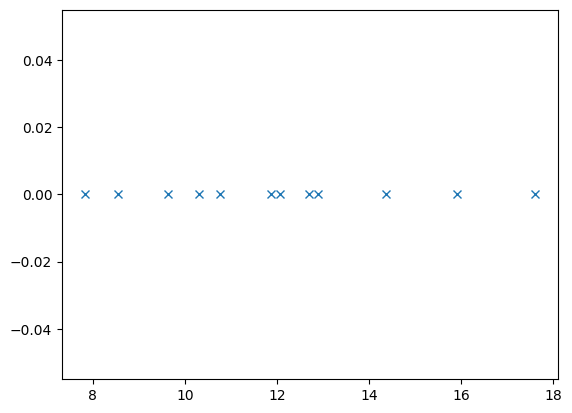

Group 4


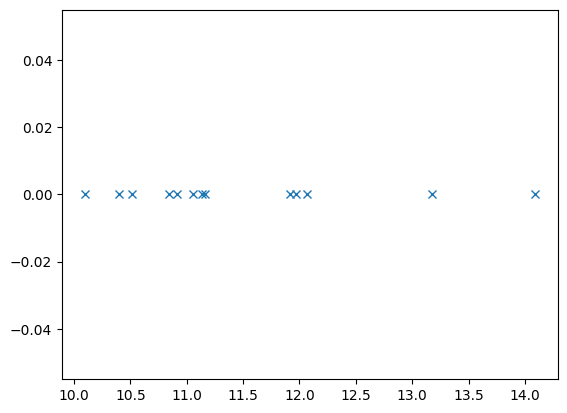

Group 0


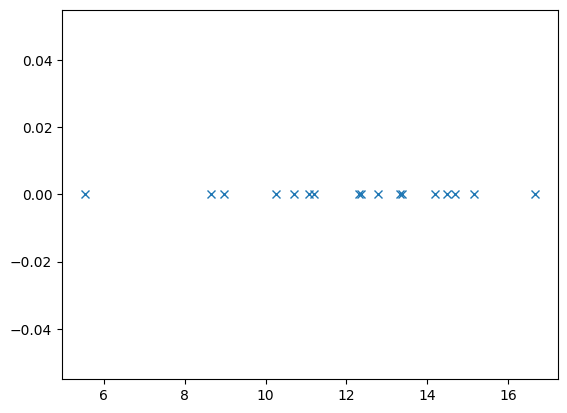

In [17]:
from pprint import pprint
readability_clusters = k_means(readability_feature_matrix, 5)
groups = labels_to_clusters(readability_clusters)
pprint(groups)
for label, sample_indices in groups.items():
    print("Group", label)
    readability_scores = sublist(y, sample_indices)
    plot_at_y(readability_scores, 0)

In [5]:
dataset = json.load(open("data/df/df_summaries_features.json"))
dataset_features = np.array([datum['features'] for datum in dataset])
dataset_features.shape

(2225, 7)

In [ ]:
def get_percentile(values, pct):
    p = np.percentile(values, pct)
feature_0 = dataset_features[:, 0]
feature_2 = dataset_features[:, 2]


In [ ]:
# stylistic statistics of 2000 articles 
# prototype by tuesday
# lit review: group-level prompt refinement
# evaluation: human-in-the-loop prompt evaluation and refinement CHI VIS UIST
# mid Feb: Introduction & relation works, draft for user requirements (combining pilot study), initial system, two more weeks to refine
# 

In [9]:
paragraph = "dasdsadsadsadasdsadsadsa"
prompt = "Paragraph: ${paragraph}"
print(prompt)
prompt = prompt.replace("${paragraph}", "?????")
print(prompt)

Paragraph: ${paragraph}
Paragraph: ?????


In [3]:
import concurrent
from tqdm import tqdm
def multithread_prompts(prompts):
    l = len(prompts)
    # results = np.zeros(l)
    with tqdm(total=l) as pbar:
        executor = concurrent.futures.ThreadPoolExecutor(max_workers=len(prompts))
        futures = [executor.submit(request_chatgpt_gpt4, prompt) for prompt in prompts]
        for _ in concurrent.futures.as_completed(futures):
            pbar.update(1)
    concurrent.futures.wait(futures)
    return [future.result() for future in futures]

def multithread_embedding(texts):
    l = len(texts)
    with tqdm(total=l) as pbar:
        executor = concurrent.futures.ThreadPoolExecutor(max_workers=len(texts))
        futures = [executor.submit(get_embedding, text) for text in texts]
        for _ in concurrent.futures.as_completed(futures):
            pbar.update(1)
    concurrent.futures.wait(futures)
    return [future.result() for future in futures]

In [4]:
def explanation_prompt_factory(keyword):
    messages = [
        {
            "role": "system",
            "content": "You are a visualization keyword explainer. Please explain the provided keyword in the context of visualization research."
        },
        {
            "role": "user",
            "content": keyword
        }
    ]
    return messages

keywords = json.load(open("missed.json"))['missed']
print(len(keywords))
keyword_explanation_prompts = [explanation_prompt_factory(keyword) for keyword in keywords]
keyword_explanations = multithread_prompts(keyword_explanation_prompts)
res = []
for keyword, keyword_explanation in zip(keywords, keyword_explanations):
    res.append({
        "id": keyword,
        "explanation": keyword_explanation,
    })
save_json(res, "keyword_explanations.json")


1472


100%|██████████| 1472/1472 [00:30<00:00, 47.86it/s]


In [4]:
keyword_explanations = json.load(open("keyword_explanations.json"))
keyword_explanations = [datum['explanation'] for datum in keyword_explanations]
embeddings = multithread_embedding(keyword_explanations)

100%|██████████| 1472/1472 [00:14<00:00, 104.21it/s]


In [5]:
keywords = json.load(open("missed.json"))['missed']

In [6]:
res = []
for keyword, keyword_explanation, embedding in zip(keywords, keyword_explanations, embeddings):
    res.append({
        "id": keyword,
        "explanation": keyword_explanation,
        "embedding": embedding
    })
save_json(res, "keyword_explanations_w_embedding.json")